In [ ]:
import matplotlib.pyplot as plt
import scipy.signal as signal
import numpy as np

In [ ]:
# Valores de la Tabla 1
R = 0.5
Cs = 0.2
Cp = 2

# Valores de tendinopatia
R_1 = 0.3
Cs_1 = 0.1
Cp_1 = 2

# Valores de SHA
R_2 = 0.5
Cs_2 = 0.4
Cp_2 = 4

# Tiempo
start = 0
end = 15

step = 1e-3
time = np.arange(start, end, step)

# Entrada
F = 10
F0 = 5
F_array = np.full(time.shape, F)
F0_array = np.full(time.shape, F0)

In [ ]:
def res_transfer(R, Cs, Cp, F, F0):
  '''
  Función que retorna el valor de x, representado de la forma x = H1(s)F(s) - H2(s)F0(s).
  Las funciones de transferencia H(s) fueron demostradas en el artículo

  Parámetros:
    - R: Amortiguamiento viscoso.
    - Cs: Elasticidad de los tendones.
    - Cp: Elasticidad del sarcolema.
    - F: Fuerza externa.
    - F0: Fuerza de contracción muscular.

  Salidas:
    - x: Elongación del músculo.

  '''
  # Definición de las funciones de transferencia
  num_1 = [Cs*Cp*R, Cp]
  num_2 = [Cp]
  den = [(R*Cs + R*Cp), 1]

  sys_1 = signal.TransferFunction(num_1, den)
  sys_2 = signal.TransferFunction(num_2, den)

  # Generación de la simulación
  t_out1, x_out1, _ = signal.lsim(sys_1, F, T = time)
  t_out2, x_out2, _ = signal.lsim(sys_2, F0, T = time)

  return (x_out1 - x_out2)

In [ ]:
def encontrar_estabilizacion(array, tolerancia=1e-4, ventana=5):
    """
    Encuentra el índice a partir del cual los valores del array se estabilizan.

    Parámetros:
      - array: numpy array con los valores.
      - tolerancia: diferencia mínima considerada como cambio significativo.
      - ventana: número de elementos consecutivos que deben cumplir la condición.

    Salidas:
      - Índice desde el cual el array se considera estabilizado.
    """
    diferencias = np.abs(np.diff(array))
    for i in range(len(diferencias) - ventana + 1):
        if np.all(diferencias[i:i+ventana] < tolerancia):
            return i + 1  # +1 porque diff reduce una posición
    return -1  # No se estabiliza dentro del array

In [ ]:
def t_subida(array, est, t):
  '''
  Calcula el valor final de una función, así como su tiempo de subida
  (cuanto tarda en pasar del 10% del valor final al 90% del mismo)

  Parámetro
    -array: Vector con los valores de la función.
    -est: Indice del valor final.
    -t: Vector de tiempo.

  Salidas
    - Valor final de la función.
    - Tiempo de subida de la función.
  '''
  valor_final = array[est]
  porcentaje_10 = (np.abs(array - valor_final*0.1)).argmin()
  porcentaje_90 = (np.abs(array - valor_final*0.9)).argmin()
  t_subida = t[porcentaje_90] - t[porcentaje_10]
  return valor_final, t_subida

In [ ]:
# Calculo de las elongaciones
x = res_transfer(R, Cs, Cp, F_array, F0_array)
x_1 = res_transfer(R_1, Cs_1, Cp_1, F_array, F0_array)
x_2 = res_transfer(R_2, Cs_2, Cp_2, F_array, F0_array)

# Calcular el momento en el que se estabiliza el valor de elongación
est_ctr = encontrar_estabilizacion(x, 5e-5)
est_td = encontrar_estabilizacion(x_1, 5e-5)
est_sha = encontrar_estabilizacion(x_2, 1e-5)

# Calcular el valor final y los tiempos de subida
vf_ctr, ts_ctr = t_subida(x, est_ctr, time)
vf_td, ts_td = t_subida(x_1, est_td, time)
vf_sha, ts_sha = t_subida(x_2, est_sha, time)

print(f'''
Para los datos de la tabla:
  Valor final: {vf_ctr}
  Tiempo de subida: {ts_ctr}

Para los datos de tendinopatía:
  Valor final: {vf_td}
  Tiempo de subida: {ts_td}

Para los datos de SHA:
  Valor final: {vf_sha}
  Tiempo de subida: {ts_sha}
''')


Para los datos de la tabla:
  Valor final: 9.94507144653429
  Tiempo de subida: 2.259
      
Para los datos de tendinopatía:
  Valor final: 9.968551472820785
  Tiempo de subida: 1.3670000000000002

Para los datos de SHA:
  Valor final: 19.978010960387458
  Tiempo de subida: 4.603



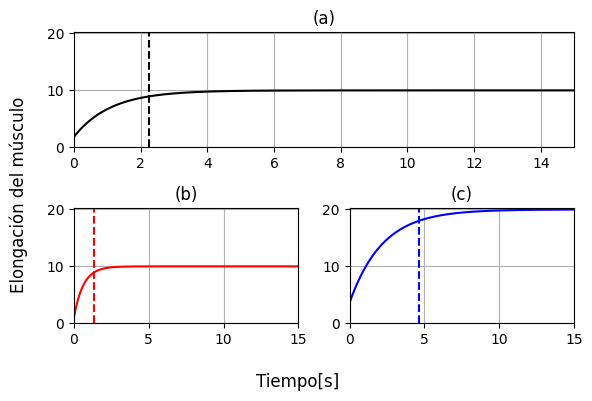

In [ ]:
# Graficar las soluciones.
fig = plt.figure(figsize=(6, 4))

plt.subplot(2,1,1)
plt.plot(time, x, color = 'black')
plt.axvline(ts_ctr, color='black', linestyle='dashed')
plt.xlim(start, end)
plt.ylim(0, 20.2)
plt.title('(a)')
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(time, x_1, color='red')
plt.axvline(ts_td, color='red', linestyle='dashed')
plt.xlim(start, end)
plt.ylim(0, 20.2)
plt.title('(b)')
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(time, x_2, color='blue')
plt.axvline(ts_sha, color='blue', linestyle='dashed')
plt.xlim(start, end)
plt.ylim(0, 20.2)
plt.title('(c)')
plt.grid(True)

fig.supxlabel('Tiempo[s]')
fig.supylabel('Elongación del músculo')
plt.tight_layout()
plt.plot()
plt.savefig('extension1.png')

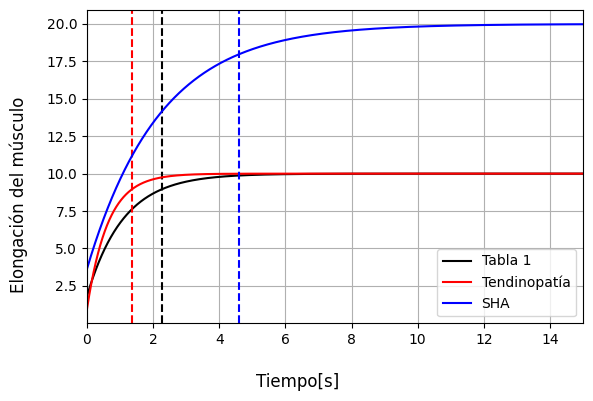

In [ ]:
# Graficar las soluciones juntas.
fig = plt.figure(figsize=(6, 4))

plt.plot(time, x, color = 'black', label='Tabla 1')
plt.axvline(ts_ctr, color='black', linestyle='dashed')

plt.plot(time, x_1, color='red', label='Tendinopatía')
plt.axvline(ts_td, color='red', linestyle='dashed')

plt.plot(time, x_2, color='blue', label='SHA')
plt.axvline(ts_sha, color='blue', linestyle='dashed')

plt.legend()
plt.xlim(start, end)
#plt.ylim(0, 20.2)
fig.supxlabel('Tiempo[s]')
fig.supylabel('Elongación del músculo')
plt.grid(True)
plt.tight_layout()
plt.plot()
plt.savefig('extension2.png')